In [4]:
import pandas as pd    #1.1

tsv_path =r"C:\Users\10147\Desktop\earthquakes-2025-11-10_18-18-40_+0800.tsv"
Sig_Eqs = pd.read_csv(tsv_path, sep="\t", low_memory=False, encoding="utf-8")
import re

# Sig_Eqs = pd.read_csv(r"C:\Users\10147\Desktop\earthquakes-2025-11-10_18-18-40_+0800.tsv", sep="\t", low_memory=False, encoding="utf-8")

df = Sig_Eqs.copy()

# 必要列检查
required = {"Year", "Total Deaths", "Location Name"}
missing = required - set(df.columns)
if missing:
    raise ValueError(f"缺少必要列: {missing}")

# 类型与过滤
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Total Deaths"] = pd.to_numeric(df["Total Deaths"], errors="coerce")
df = df[df["Year"] >= -2150]

# 严格提取国家：仅取第一个冒号前的部分
country = df["Location Name"].astype(str).str.split(":", n=1, expand=True)[0].str.strip()
df = df.assign(Country=country)

# 去除空国家
df = df[df["Country"].notna() & (df["Country"] != "")]

# 汇总（默认 sum 会忽略缺失值，不做任何猜测填充）
top10 = (
    df.groupby("Country", as_index=False)["Total Deaths"].sum()
      .rename(columns={"Total Deaths": "Total_Deaths_Since_2150BC"})
    
      .sort_values("Total_Deaths_Since_2150BC", ascending=False)
      .head(10)
)

print("自公元前2150年以来各国地震致死总数（前十）：")
print(top10.to_string(index=False))





自公元前2150年以来各国地震致死总数（前十）：
   Country  Total_Deaths_Since_2150BC
     CHINA                  2106535.0
    TURKEY                  1008342.0
      IRAN                   745611.0
     ITALY                   423280.0
     SYRIA                   417724.0
     HAITI                   323782.0
AZERBAIJAN                   319251.0
     JAPAN                   318441.0
 INDONESIA                   282517.0
   ARMENIA                   189000.0


C:\Users\10147\AppData\Local\Temp\ipykernel_32476\984290688.py:28: UserWarning: Glyph 20026 (\N{CJK UNIFIED IDEOGRAPH-4E3A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\10147\AppData\Local\Temp\ipykernel_32476\984290688.py:28: UserWarning: Glyph 36127 (\N{CJK UNIFIED IDEOGRAPH-8D1F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\10147\AppData\Local\Temp\ipykernel_32476\984290688.py:28: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\10147\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20026 (\N{CJK UNIFIED IDEOGRAPH-4E3A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\10147\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36127 (\N{CJK UNIFIED IDEOGRAPH-8D1F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\10147\anaconda3\Lib\site-packages

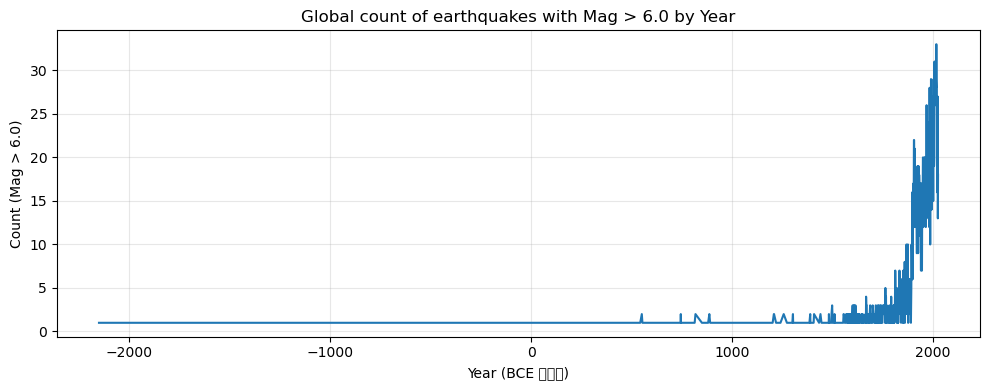

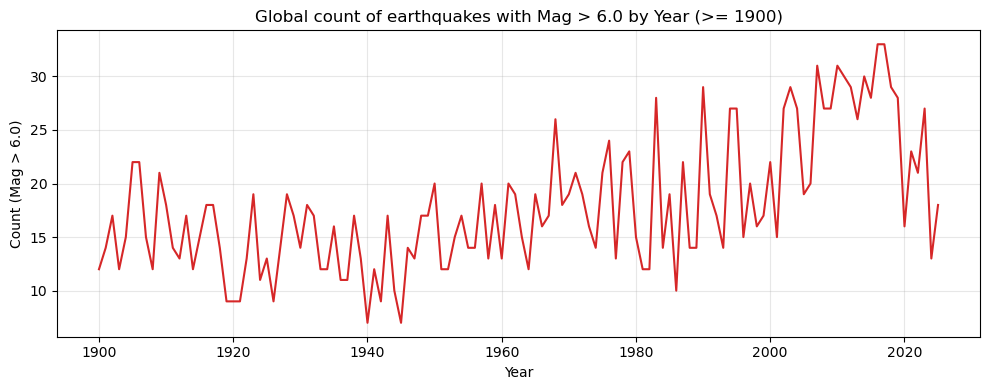

     Year  count_m_gt_6
0 -2150.0             1
1 -2000.0             1
2 -1250.0             1
3 -1050.0             1
4  -479.0             1
5  -426.0             1
6  -400.0             1
7  -373.0             1
8  -330.0             1
9  -250.0             1
       Year  count_m_gt_6
542  2016.0            33
543  2017.0            33
544  2018.0            29
545  2019.0            28
546  2020.0            16
547  2021.0            23
548  2022.0            21
549  2023.0            27
550  2024.0            13
551  2025.0            18


In [6]:
import matplotlib.pyplot as plt        #1.2
for col in ["Year", "Mag"]:
    if col not in df.columns:
        raise ValueError(f"缺少必要列: {col}")

df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Mag"]  = pd.to_numeric(df["Mag"],  errors="coerce")

# 过滤：Mag > 6.0，且 Year 非缺失
df6 = df[(df["Mag"] > 6.0) & df["Year"].notna()]

counts = (
    df6.groupby("Year")
       .size()
       .reset_index(name="count_m_gt_6")
       .sort_values("Year")
)

plt.figure(figsize=(10, 4))
plt.plot(counts["Year"], counts["count_m_gt_6"], color="#1f77b4", lw=1.5)
plt.title("Global count of earthquakes with Mag > 6.0 by Year")
plt.xlabel("Year (BCE 为负数)")
plt.ylabel("Count (Mag > 6.0)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

modern = counts[counts["Year"] >= 1900]
if len(modern) > 0:
    plt.figure(figsize=(10, 4))
    plt.plot(modern["Year"], modern["count_m_gt_6"], color="#d62728", lw=1.5)
    plt.title("Global count of earthquakes with Mag > 6.0 by Year (>= 1900)")
    plt.xlabel("Year")
    plt.ylabel("Count (Mag > 6.0)")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# 输出前几行结果核对
print(counts.head(10))
print(counts.tail(10))

In [5]:
from typing import Dict, Any   
df0 = Sig_Eqs.copy()             #1.3

# 必要列检查
need = {"Year", "Location Name", "Mag"}
missing = need - set(df0.columns)
if missing:
    raise ValueError(f"缺少必要列: {missing}")

# 类型转换
df0["Year"] = pd.to_numeric(df0["Year"], errors="coerce")
df0["Mag"]  = pd.to_numeric(df0["Mag"],  errors="coerce")

# 严格国家提取：只取第一个冒号左边
df0["Country"] = df0["Location Name"].astype(str).str.split(":", n=1, expand=True)[0].str.strip()

# 时间过滤：自公元前 2150 年以来
df0 = df0[df0["Year"] >= -2150].copy()

# 识别日期相关列
def _pick(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    return None

col_date  = _pick(df0, ["Date", "date"])
col_month = _pick(df0, ["Mo", "Month"])
col_day   = _pick(df0, ["Dy", "Day"])

# 生成可读日期字符串
def compose_date_str(row) -> str:
    if col_date and pd.notna(row.get(col_date)):
        return str(row[col_date]).strip()
    y = row.get("Year")
    if pd.isna(y):
        return ""
    try:
        yi = int(y)
    except Exception:
        return ""
    def to_int(v):
        try:
            return int(v)
        except Exception:
            return None
    m = to_int(row.get(col_month)) if col_month else None
    d = to_int(row.get(col_day))   if col_day   else None
    s_year = f"{abs(yi):04d}"
    s_md = ""
    if m is not None:
        s_md += f"-{m:02d}"
        if d is not None:
            s_md += f"-{d:02d}"
    return f"{s_year}{s_md} BCE" if yi < 0 else f"{s_year}{s_md}"

df0["Date_str"] = df0.apply(compose_date_str, axis=1)

# 核心函数
def CountEq_LargestEq(df: pd.DataFrame, country: str) -> Dict[str, Any]:
    g = df[df["Country"] == country]
    total_count = int(len(g))
    if total_count == 0:
        return {"total_count": 0, "largest_eq_date": "", "largest_mag": float("nan")}
    g_valid = g[pd.notna(g["Mag"])]
    if g_valid.empty:
        return {"total_count": total_count, "largest_eq_date": "", "largest_mag": float("nan")}
    max_mag = float(g_valid["Mag"].max())
    g_max = g_valid[g_valid["Mag"] == max_mag].copy()
    # 按 Year, Month, Day 早到晚排序
    sort_cols = ["Year"]
    if col_month: sort_cols.append(col_month)
    if col_day:   sort_cols.append(col_day)
    for c in sort_cols:
        g_max[c] = pd.to_numeric(g_max[c], errors="coerce")
    g_max = g_max.sort_values(sort_cols, na_position="last")
    date_str = str(g_max.iloc[0]["Date_str"])
    return {"total_count": total_count, "largest_eq_date": date_str, "largest_mag": max_mag}

# 对每个国家应用并排序（先按总次数降序，再按最大震级降序）
countries = df0["Country"].dropna().unique().tolist()
rows = []
for c in countries:
    out = CountEq_LargestEq(df0, c)
    rows.append({"Country": c, **out})

result = (
    pd.DataFrame(rows)
      .sort_values(["total_count", "largest_mag"], ascending=[False, False])
      .reset_index(drop=True)
)

print(result.head(20))        


             Country  total_count largest_eq_date  largest_mag
0              CHINA          626      1668-07-25          8.5
1          INDONESIA          404      2004-12-26          9.1
2               IRAN          388      0856-12-22          7.9
3              JAPAN          364      2011-03-11          9.1
4             TURKEY          344      1939-12-26          7.8
5              ITALY          332      1915-01-13          7.5
6             GREECE          275      0365-07-21          8.0
7        PHILIPPINES          226      1897-09-21          8.7
8             MEXICO          204      1787-03-28          8.6
9              CHILE          200      1960-05-22          9.5
10              PERU          185      1716-02-06          8.8
11            RUSSIA          157      1952-11-04          9.0
12        BALKANS NW          118      1667-04-06          7.2
13  PAPUA NEW GUINEA          109      1919-05-06          8.2
14        CALIFORNIA          104      1857-01-09      

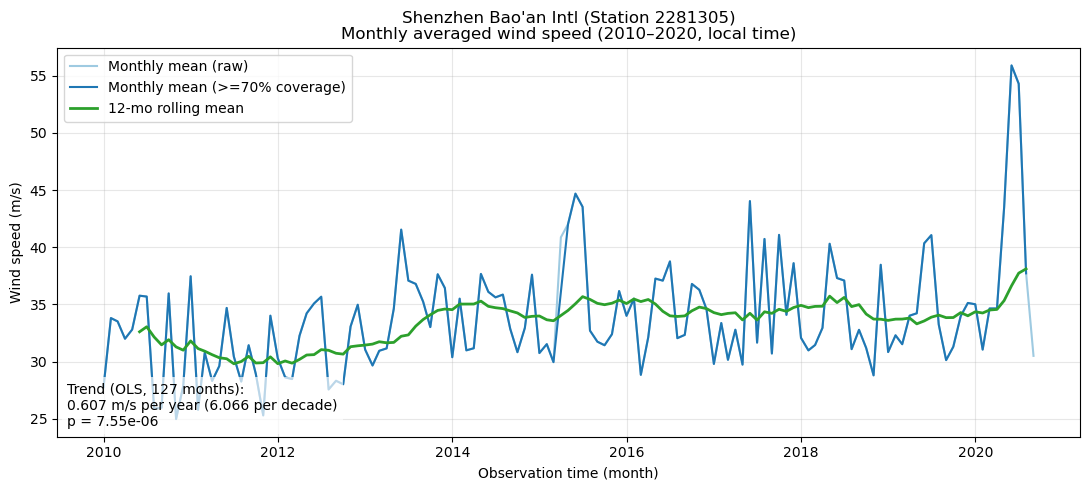

时间窗口： 2010-01-01 — 2020-12-31
通过完整性过滤的月份数：127 / 129
线性趋势斜率：0.6066 m/s/年  （每十年 6.0659 m/s）
p 值：7.549e-06 （常用阈值 0.05）


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import linregress
import calendar

csv_path = Path(r"C:\Users\10147\Desktop\2281305.csv")  # 你的文件路径
peek_cols = pd.read_csv(csv_path, nrows=0).columns
usecols = ["DATE", "WND"] if set(["DATE", "WND"]).issubset(peek_cols) else None
df = pd.read_csv(csv_path, low_memory=False, usecols=usecols)

df["DATE"] = pd.to_datetime(df["DATE"], errors="coerce", utc=True)
df = df.dropna(subset=["DATE"])
df["dt_local"] = df["DATE"].dt.tz_convert("Asia/Shanghai")

def extract_wspd_ms(df: pd.DataFrame) -> pd.Series:
    # WND: dir, dir_qc, type, speed, spd_qc
    if "WND" in df.columns:
        parts = df["WND"].astype(str).str.split(",", expand=True)
        if parts.shape[1] < 5:
            raise ValueError("WND 字段格式异常，无法分解为 5 段。")
        spd = pd.to_numeric(parts[3], errors="coerce")  # m/s
        qc  = parts[4].astype(str).str.strip()
        # 质量控制与缺测值
        spd[(spd >= 999) | (spd < 0)] = np.nan
        spd[~qc.isin(["1", "5"])] = np.nan
        return spd
    for c in ["WIND_SPEED", "wind_speed", "WSPD", "wspd"]:
        if c in df.columns:
            return pd.to_numeric(df[c], errors="coerce")

    raise ValueError("未找到 WND 或可识别的风速列。")

df["wspd_ms"] = extract_wspd_ms(df)
start = pd.Timestamp("2010-01-01 00:00:00", tz="Asia/Shanghai")
end   = pd.Timestamp("2020-12-31 23:59:59", tz="Asia/Shanghai")
df = df[(df["dt_local"] >= start) & (df["dt_local"] <= end)].copy()
def expected_hours(ts: pd.Timestamp) -> int:
    y, m = ts.year, ts.month
    return calendar.monthrange(y, m)[1] * 24  # Asia/Shanghai 无夏令时

# 按月聚合：均值与样本数
s = df.set_index("dt_local")["wspd_ms"]
monthly = s.resample("MS").agg(mean="mean", count="count").dropna(subset=["mean"], how="any")

# 计算每月完整性比例并过滤
exp_hours = pd.Series({idx: expected_hours(idx) for idx in monthly.index})
monthly["coverage"] = monthly["count"] / exp_hours
monthly_f = monthly[monthly["coverage"] >= 0.70].copy()
if len(monthly_f) < 12:
    print("有效月份不足以进行稳健的趋势分析。")
    slope_per_year = np.nan
    slope_per_decade = np.nan
    p_value = np.nan
else:
    # 使用“年”为时间自变量（以首月为零点）
    t_years = (monthly_f.index - monthly_f.index[0]).days / 365.2425
    y = monthly_f["mean"].to_numpy()
    # 去除 NaN
    mask = ~np.isnan(t_years) & ~np.isnan(y)
    res = linregress(t_years[mask], y[mask])
    slope_per_year = res.slope
    slope_per_decade = res.slope * 10.0
    p_value = res.pvalue
    # 95% 置信区间（近似）：斜率 ± 1.96*stderr
    ci95 = (res.slope - 1.96*res.stderr, res.slope + 1.96*res.stderr)
    ci95_decade = (ci95[0]*10, ci95[1]*10)

plt.figure(figsize=(11, 5))
plt.plot(monthly.index, monthly["mean"], label="Monthly mean (raw)", color="#9ecae1")
plt.plot(monthly_f.index, monthly_f["mean"], label="Monthly mean (>=70% coverage)", color="#1f77b4")
# 12 个月滚动均值（在过滤后的序列上）
roll12 = monthly_f["mean"].rolling(12, min_periods=6).mean()
plt.plot(monthly_f.index, roll12, label="12-mo rolling mean", color="#2ca02c", linewidth=2)

title = "Shenzhen Bao'an Intl (Station 2281305)\nMonthly averaged wind speed (2010–2020, local time)"
plt.title(title)
plt.xlabel("Observation time (month)")
plt.ylabel("Wind speed (m/s)")
plt.grid(alpha=0.3)
plt.legend()

# 在图上标注趋势结果
if not np.isnan(slope_per_year):
    ann = (f"Trend (OLS, {len(monthly_f)} months):\n"
           f"{slope_per_year:.3f} m/s per year "
           f"({slope_per_decade:.3f} per decade)\n"
           f"p = {p_value:.3g}")
    plt.gca().text(0.01, 0.02, ann, transform=plt.gca().transAxes,
                   fontsize=10, va="bottom", ha="left",
                   bbox=dict(facecolor="white", alpha=0.7, edgecolor="none"))

plt.tight_layout()
plt.show()


print("时间窗口：", start.strftime("%Y-%m-%d"), "—", end.strftime("%Y-%m-%d"))
print(f"通过完整性过滤的月份数：{len(monthly_f)} / {len(monthly)}")
if not np.isnan(slope_per_year):
    print(f"线性趋势斜率：{slope_per_year:.4f} m/s/年  （每十年 {slope_per_decade:.4f} m/s）")
    print(f"p 值：{p_value:.4g} （常用阈值 0.05）")

In [7]:
pip install scipy pandas matplotlib


Note: you may need to restart the kernel to use updated packages.


原始形状: (24107, 41)
原始列名: ['lon', 'lat', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987'] ...
清洗后形状: (24107, 40)（删除了 0 行全缺失记录）
年份列示例: ['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989']


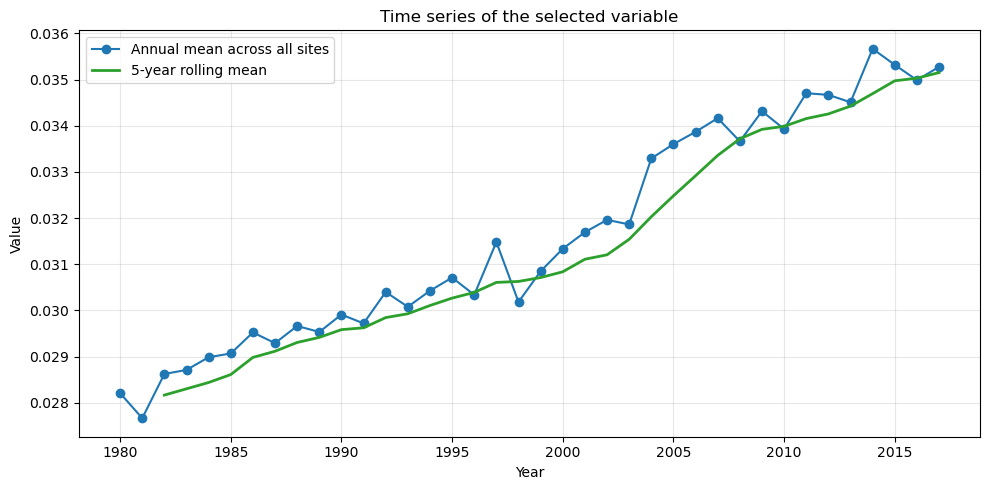

=== Simple statistical checks ===
Count (non-NaN): 38
Mean: 0.0316368
Median: 0.0310926
Std: 0.00238399
Min: 0.0276654 at 1981
Max: 0.0356664 at 2014
5th–95th percentiles: 0.0285627 — 0.0352822
Skewness: 0.220 | Kurtosis: -1.355
Lag-1 autocorr: 0.973
Linear trend slope: 0.000209878 per year
Outliers (>+3σ): 0 | (<-3σ): 0


In [5]:
import pandas as pd
import numpy as np
from pathlib import Path

# 3.1 读取（使用你的路径）
csv_path = Path(r"C:\Users\10147\Desktop\造林\7-3\7-3\O3_data\LO3_38.csv")

# 尝试常见编码，避免中文路径/编码问题
try:
    df = pd.read_csv(csv_path, encoding="utf-8-sig", low_memory=False)
except UnicodeDecodeError:
    df = pd.read_csv(csv_path, encoding="gb18030", low_memory=False)

print("原始形状:", df.shape)
print("原始列名:", list(df.columns)[:10], "...")

# 3.1 清除无用列和异常
# - 去掉 Unnamed 列、重复列、全为空的列
df = df.loc[:, ~df.columns.str.contains(r"^Unnamed", na=False)]
df = df.loc[:, ~df.columns.duplicated()]
df = df.dropna(axis=1, how="all")

# - 识别“年份列”（如 1980, 2010 等数字列）；其余视为元数据（经纬度、站点等）
year_cols = [c for c in df.columns if str(c).strip().isdigit()]
meta_cols = [c for c in df.columns if c not in year_cols]

# - 统一为数值，非法转 NaN
for c in year_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# - 常见坏值替换为 NaN（按需增减）
bad_sentinels = [-9999, -999, -99, 9999, 99999]
df[year_cols] = df[year_cols].replace(bad_sentinels, np.nan)

# - 设定简单规则：负值视为无效（很多环境浓度不应为负）
df[year_cols] = df[year_cols].mask(df[year_cols] < 0)

# - 可选：极端值过滤（按整体分位数阈值；避免个别异常拖拽）
q01, q99 = np.nanpercentile(df[year_cols].values.ravel(), [0.1, 99.9])
df[year_cols] = df[year_cols].mask((df[year_cols] < q01) | (df[year_cols] > q99))

# - 删除所有年份都为 NaN 的行
before_rows = len(df)
df_clean = df.dropna(subset=year_cols, how="all").copy()
print(f"清洗后形状: {df_clean.shape}（删除了 {before_rows - len(df_clean)} 行全缺失记录）")
print("年份列示例:", year_cols[:10])
def build_time_series(data: pd.DataFrame):
    """
    返回一个 pandas Series：index 为时间（DatetimeIndex 或 年度 int），values 为所选变量值
    同时返回变量名说明 label
    """
    # 情况 A：宽表（每列是年份）
    if len(year_cols) >= 3:
        # 仅保留年份列做时间序列；取所有样本在同一年的均值（去除 NaN）
        for y in year_cols:
            data[y] = pd.to_numeric(data[y], errors="coerce")
        ts = data[year_cols].mean(axis=0, skipna=True)
        ts.index = ts.index.astype(int)  # 年度索引
        label = "Annual mean across all sites"
        return ts.sort_index(), label

    # 情况 B：长表（有时间列）
    if time_col is not None:
        d = data.copy()
        d[time_col] = pd.to_datetime(d[time_col], errors="coerce")
        d = d.dropna(subset=[time_col])
        # 选一个数值变量：优先含 O3/ozone 的列，否则第一个数值列
        target_candidates = [c for c in num_cols if any(k in str(c).lower() for k in ["o3", "ozone"])]
        target_var = target_candidates[0] if target_candidates else (num_cols[0] if num_cols else None)
        if target_var is None:
            raise ValueError("未找到可用于作图的数值列。")
        d = d[[time_col, target_var]].dropna()
        d = d.sort_values(time_col).set_index(time_col)

        # 频率自适应：如果数据<=每日，按月均值；如果已是年度，用年度均值
        inferred = pd.infer_freq(d.index)
        if inferred in ["A", "Y", "AS", "YS"]:
            ts = d[target_var].resample("A").mean()
            label = f"{target_var} (annual mean)"
        else:
            ts = d[target_var].resample("MS").mean()  # 月均值
            label = f"{target_var} (monthly mean)"
        return ts, label

    raise ValueError("无法识别时间结构：既没有年份列，也没有可识别的时间列。")

ts, ts_label = build_time_series(df)

# 绘图（含滚动均值）
plt.figure(figsize=(10, 5))
if isinstance(ts.index[0], (np.integer, int)):  # 年度索引
    x = ts.index.astype(int)
    plt.plot(x, ts.values, marker="o", label=ts_label, color="#1f77b4")
    if len(ts) >= 5:
        roll = ts.rolling(5, min_periods=3).mean()
        plt.plot(x, roll.values, label="5-year rolling mean", color="#2ca02c", linewidth=2)
    plt.xlabel("Year")
else:  # DatetimeIndex
    plt.plot(ts.index, ts.values, label=ts_label, color="#1f77b4")
    if len(ts) >= 12:
        roll = ts.rolling(12, min_periods=6).mean()
        plt.plot(ts.index, roll.values, label="12-mo rolling mean", color="#2ca02c", linewidth=2)
    plt.xlabel("Time")

plt.ylabel("Value")
plt.title("Time series of the selected variable")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# ============== 3.3 At least 5 simple statistical checks ==============
def report_basic_stats(series: pd.Series):
    s = series.dropna()
    n = len(s)
    mean = s.mean()
    median = s.median()
    std = s.std()
    p5, p95 = s.quantile([0.05, 0.95])
    vmin, vmax = s.min(), s.max()
    imin, imax = s.idxmin(), s.idxmax()
    skew = s.skew()
    kurt = s.kurt()
    # 线性趋势斜率（每期增长量；年度序列=每年，月度序列=每月）
    if isinstance(s.index[0], (np.integer, int)):
        x = np.arange(n)  # 均匀年度间隔
    else:
        # 将时间转换为年为单位的连续变量
        x = (s.index - s.index[0]).days / 365.2425
    slope = np.polyfit(x, s.values, 1)[0] if n >= 3 else np.nan
    # 一阶自相关
    ac1 = s.autocorr(lag=1) if n >= 2 else np.nan
    # 3σ 异常点数量
    z = (s - mean) / std if std and std > 0 else pd.Series(np.zeros_like(s), index=s.index)
    out_hi = (z > 3).sum()
    out_lo = (z < -3).sum()

    print("=== Simple statistical checks ===")
    print(f"Count (non-NaN): {n}")
    print(f"Mean: {mean:.6g}")
    print(f"Median: {median:.6g}")
    print(f"Std: {std:.6g}")
    print(f"Min: {vmin:.6g} at {imin}")
    print(f"Max: {vmax:.6g} at {imax}")
    print(f"5th–95th percentiles: {p5:.6g} — {p95:.6g}")
    print(f"Skewness: {skew:.3f} | Kurtosis: {kurt:.3f}")
    print(f"Lag-1 autocorr: {ac1:.3f}")
    unit = "per year" if isinstance(s.index[0], (np.integer, int)) else "per year"  # 统一转换为每年
    if not isinstance(s.index[0], (np.integer, int)):
        # 如果是月序列，slope 目前是每年，已在 x 中按年刻度
        pass
    print(f"Linear trend slope: {slope:.6g} {unit}")
    print(f"Outliers (>+3σ): {out_hi} | (<-3σ): {out_lo}")

report_basic_stats(ts)